In [5]:
from __future__ import print_function
import pickle
import numpy as np
import h5py
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Dropout, Input, GlobalMaxPooling1D, Conv1D, Embedding, MaxPooling1D
from keras.models import Model
from keras.models import load_model
from keras.initializers import Constant
import gensim.downloader as api
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from keras import backend as K

In [6]:
NEW_DATA_DIR = "sarcasmania-insult.csv"
MAX_SEQUENCE_LENGTH = 100
MAX_NUM_WORDS = 20000
EMBEDDING_DIM = 300
VALIDATION_SPLIT = 0.2

In [7]:
model = load_model('my_model.h5')

In [8]:
print('Loading Toxic Comments data.')
with open(NEW_DATA_DIR) as f:
    toxic_comments = pd.read_csv(NEW_DATA_DIR)

Loading Toxic Comments data.


In [9]:
print('Getting Comment Labels.')
prediction_labels = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
labels = toxic_comments[prediction_labels].values

Getting Comment Labels.


In [10]:
print('Processing text dataset')
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(toxic_comments['comment_text'].fillna("DUMMY_VALUE").values)
sequences = tokenizer.texts_to_sequences(toxic_comments['comment_text'].fillna("DUMMY_VALUE").values)
word_index = tokenizer.word_index

Processing text dataset


In [11]:
print('Found %s sequences.' % len(sequences))
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

Found 1427 sequences.


In [12]:
nb_validation_samples = int(VALIDATION_SPLIT * data.shape[0])
x_train = data[:-nb_validation_samples]
y_train = labels[:-nb_validation_samples]
x_val = data[-nb_validation_samples:]
y_val = labels[-nb_validation_samples:]

In [13]:
history = model.fit(x_train, y_train, epochs=2, batch_size=512, validation_data=(x_val, y_val))
model.save('feed_model.h5')

Train on 1142 samples, validate on 285 samples
Epoch 1/2
1142/1142 [==============================] - 3s 3ms/step - loss: 0.1050 - acc: 0.9657 - val_loss: 0.1292 - val_acc: 0.9386
Epoch 2/2
1142/1142 [==============================] - 2s 2ms/step - loss: 0.0676 - acc: 0.9759 - val_loss: 0.2018 - val_acc: 0.9409


In [14]:
print("Model Accuracy: ",history.history['acc'][-1])

Model Accuracy:  0.9759193941715929


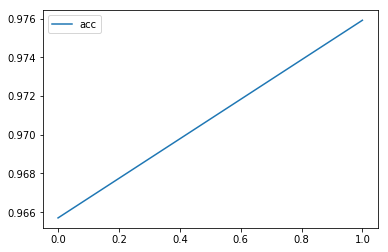

In [15]:
plt.plot(history.history['acc'], label='acc')
plt.legend()
plt.show()

In [20]:
def create_prediction(model, sequence, tokenizer, max_length, prediction_labels):
    sequence = tokenizer.texts_to_sequences(sequence)
    sequence = pad_sequences(sequence, maxlen=max_length)
    sequence_prediction = model.predict(sequence, verbose=1)
    sequence_prediction = pd.DataFrame(sequence_prediction).round(3)
    sequence_prediction.columns = prediction_labels
    return sequence_prediction

In [21]:
sequence = [input("Please input a sentence: ")]
prediction = create_prediction(model, sequence, tokenizer, MAX_SEQUENCE_LENGTH, prediction_labels)
print(prediction)

Please input a sentence: Shutup you stupid fucking bitch!
1/1 [==============================] - 0s 2ms/step
   toxic  severe_toxic  obscene  threat  insult  identity_hate
0  0.153         0.001    0.019   0.002   0.019          0.004
